In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

/Users/ravishsikha/opt/anaconda3/lib/python3.9/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


ModuleNotFoundError: No module named 'config'

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f5381124d044f10cc1860d3f30134cd0" 
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f5381124d044f10cc1860d3f30134cd0


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | rochester
Processing Record 2 of Set 13 | bathsheba
Processing Record 3 of Set 13 | kisangani
Processing Record 4 of Set 13 | komsomolskiy
Processing Record 5 of Set 13 | vao
Processing Record 6 of Set 13 | rikitea
Processing Record 7 of Set 13 | ciudad ojeda
Processing Record 8 of Set 13 | hilo
Processing Record 9 of Set 13 | lorengau
Processing Record 10 of Set 13 | tuatapere
Processing Record 11 of Set 13 | nanortalik
Processing Record 12 of Set 13 | mount gambier
Processing Record 13 of Set 13 | fereydun kenar
Processing Record 14 of Set 13 | vaini
Processing Record 15 of Set 13 | ponta delgada
Processing Record 16 of Set 13 | qaanaaq
Processing Record 17 of Set 13 | puerto ayora
Processing Record 18 of Set 13 | samusu
City not found. Skipping...
Processing Record 19 of Set 13 | grindavik
Processing Record 20 of Set 13 | sao filipe
Processing Record 21 of Set 13 | hasaki
Processing Record 22

Processing Record 34 of Set 16 | semporna
Processing Record 35 of Set 16 | arraial do cabo
Processing Record 36 of Set 16 | ribeira grande
Processing Record 37 of Set 16 | ballina
Processing Record 38 of Set 16 | victoria
Processing Record 39 of Set 16 | ksenyevka
City not found. Skipping...
Processing Record 40 of Set 16 | karaul
City not found. Skipping...
Processing Record 41 of Set 16 | sovkhoznyy
Processing Record 42 of Set 16 | kathu
Processing Record 43 of Set 16 | aksu
Processing Record 44 of Set 16 | povoa de varzim
Processing Record 45 of Set 16 | hofn
Processing Record 46 of Set 16 | riviere-au-renard
Processing Record 47 of Set 16 | ancud
Processing Record 48 of Set 16 | leningradskiy
Processing Record 49 of Set 16 | talnakh
Processing Record 50 of Set 16 | gap
Processing Record 1 of Set 17 | chuy
Processing Record 2 of Set 17 | esperance
Processing Record 3 of Set 17 | nam som
Processing Record 4 of Set 17 | tir pol
City not found. Skipping...
Processing Record 5 of Set 17

Processing Record 14 of Set 20 | namie
Processing Record 15 of Set 20 | jalu
Processing Record 16 of Set 20 | palmer
Processing Record 17 of Set 20 | danane
Processing Record 18 of Set 20 | rock springs
Processing Record 19 of Set 20 | garowe
Processing Record 20 of Set 20 | bambous virieux
Processing Record 21 of Set 20 | ous
Processing Record 22 of Set 20 | castro-urdiales
Processing Record 23 of Set 20 | marawi
Processing Record 24 of Set 20 | leshukonskoye
Processing Record 25 of Set 20 | gorkovskoye
City not found. Skipping...
Processing Record 26 of Set 20 | busia
Processing Record 27 of Set 20 | satitoa
City not found. Skipping...
Processing Record 28 of Set 20 | sumbawa
City not found. Skipping...
Processing Record 29 of Set 20 | college
Processing Record 30 of Set 20 | mount isa
Processing Record 31 of Set 20 | tabasco
Processing Record 32 of Set 20 | biak
Processing Record 33 of Set 20 | dawlatabad
Processing Record 34 of Set 20 | berdigestyakh
Processing Record 35 of Set 20 

Processing Record 2 of Set 24 | girvan
Processing Record 3 of Set 24 | mayumba
Processing Record 4 of Set 24 | kolpashevo
Processing Record 5 of Set 24 | pimentel
Processing Record 6 of Set 24 | sale
Processing Record 7 of Set 24 | abay
Processing Record 8 of Set 24 | palaiokhora
City not found. Skipping...
Processing Record 9 of Set 24 | nelson bay
Processing Record 10 of Set 24 | celestun
Processing Record 11 of Set 24 | altamont
Processing Record 12 of Set 24 | stoyba
City not found. Skipping...
Processing Record 13 of Set 24 | xining
Processing Record 14 of Set 24 | manaure
Processing Record 15 of Set 24 | aljezur
Processing Record 16 of Set 24 | portland
Processing Record 17 of Set 24 | beaufort
Processing Record 18 of Set 24 | liepaja
Processing Record 19 of Set 24 | kardamaina
Processing Record 20 of Set 24 | bardsir
Processing Record 21 of Set 24 | abu kamal
Processing Record 22 of Set 24 | blagoyevo
Processing Record 23 of Set 24 | abu samrah
Processing Record 24 of Set 24 | h

In [12]:
len(city_data)

559

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rochester,43.1548,-77.6156,69.08,84,75,6.91,US,2022-08-10 04:45:42
1,Bathsheba,13.2167,-59.5167,83.01,83,40,16.11,BB,2022-08-10 04:46:50
2,Kisangani,0.5167,25.2000,71.49,79,41,1.32,CD,2022-08-10 04:46:51
3,Komsomolskiy,40.4272,71.7189,83.12,28,34,9.22,UZ,2022-08-10 04:46:51
4,Vao,-22.6667,167.4833,67.39,61,3,19.86,NC,2022-08-10 04:46:51
5,Rikitea,-23.1203,-134.9692,73.53,79,100,17.85,PF,2022-08-10 04:46:52
6,Ciudad Ojeda,10.1964,-71.3082,80.71,81,54,4.81,VE,2022-08-10 04:46:52
7,Hilo,19.7297,-155.0900,85.28,85,100,3.44,US,2022-08-10 04:44:14
8,Lorengau,-2.0226,147.2712,84.61,69,46,7.34,PG,2022-08-10 04:46:52
9,Tuatapere,-46.1333,167.6833,44.69,79,100,1.16,NZ,2022-08-10 04:46:53


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rochester,US,2022-08-10 04:45:42,43.1548,-77.6156,69.08,84,75,6.91
1,Bathsheba,BB,2022-08-10 04:46:50,13.2167,-59.5167,83.01,83,40,16.11
2,Kisangani,CD,2022-08-10 04:46:51,0.5167,25.2000,71.49,79,41,1.32
3,Komsomolskiy,UZ,2022-08-10 04:46:51,40.4272,71.7189,83.12,28,34,9.22
4,Vao,NC,2022-08-10 04:46:51,-22.6667,167.4833,67.39,61,3,19.86
5,Rikitea,PF,2022-08-10 04:46:52,-23.1203,-134.9692,73.53,79,100,17.85
6,Ciudad Ojeda,VE,2022-08-10 04:46:52,10.1964,-71.3082,80.71,81,54,4.81
7,Hilo,US,2022-08-10 04:44:14,19.7297,-155.0900,85.28,85,100,3.44
8,Lorengau,PG,2022-08-10 04:46:52,-2.0226,147.2712,84.61,69,46,7.34
9,Tuatapere,NZ,2022-08-10 04:46:53,-46.1333,167.6833,44.69,79,100,1.16


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

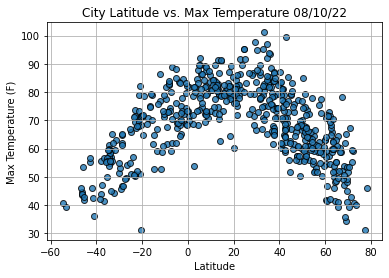

In [18]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

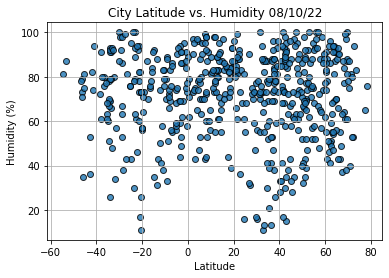

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

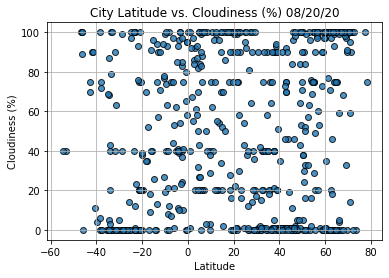

In [192]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

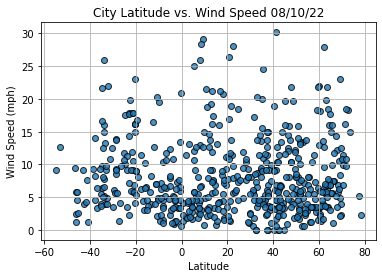

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values,)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.title(title)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Country                        TO
Date          2022-08-10 04:46:54
Lat                         -21.2
Lng                        -175.2
Max Temp                    78.96
Humidity                       94
Cloudiness                     40
Wind Speed                   9.22
Name: 13, dtype: object

In [24]:
# only get T/F
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
554     True
555     True
556     True
557    False
558    False
Name: Lat, Length: 559, dtype: bool

In [25]:
# loc methon with conditional
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rochester,US,2022-08-10 04:45:42,43.1548,-77.6156,69.08,84,75,6.91
1,Bathsheba,BB,2022-08-10 04:46:50,13.2167,-59.5167,83.01,83,40,16.11
2,Kisangani,CD,2022-08-10 04:46:51,0.5167,25.2000,71.49,79,41,1.32
3,Komsomolskiy,UZ,2022-08-10 04:46:51,40.4272,71.7189,83.12,28,34,9.22
6,Ciudad Ojeda,VE,2022-08-10 04:46:52,10.1964,-71.3082,80.71,81,54,4.81


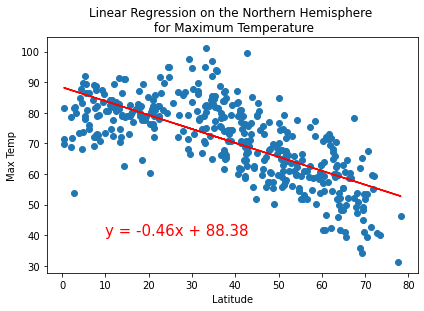

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


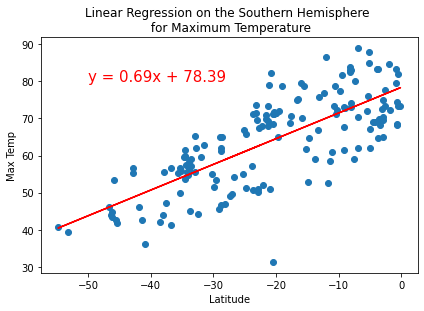

In [27]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))


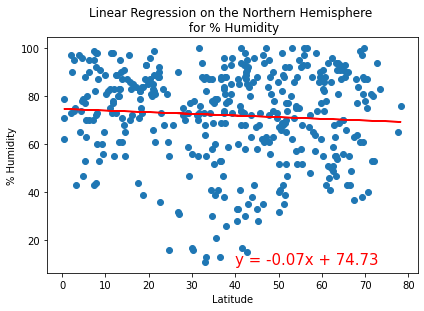

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

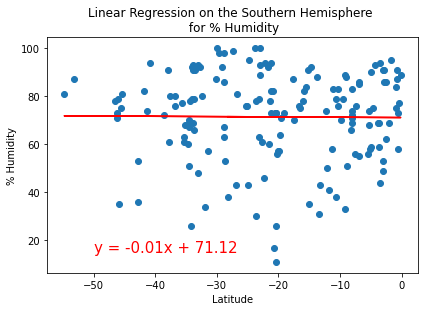

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

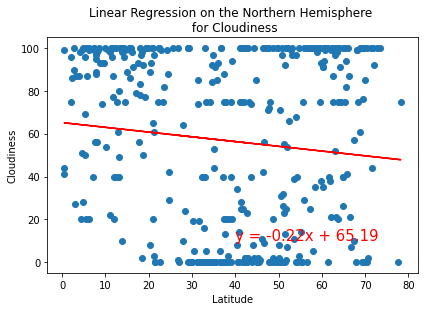

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', 'Cloudiness',(40,10))

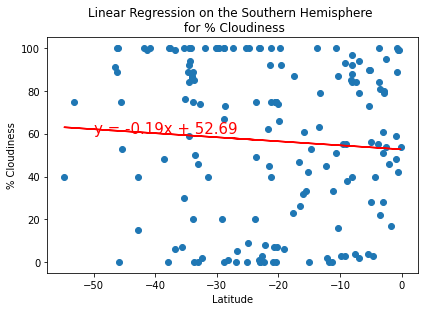

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

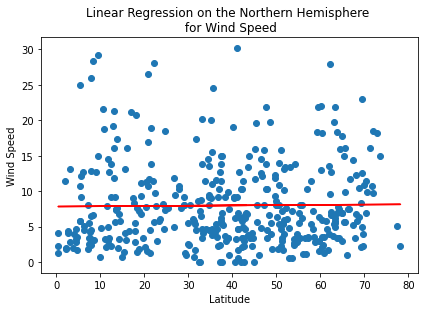

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

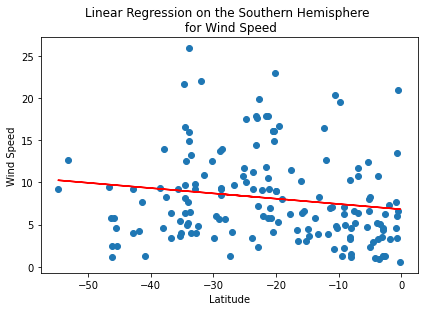

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))